Import the image into Jupyter Notebook.

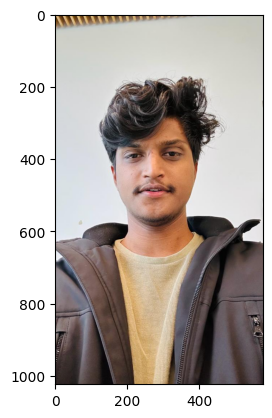

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Import an image
img = cv2.imread("/content/pic.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Analyze the image.  

In [26]:
print(img.size)
print(img.shape)
print(img.dtype)
print(img[0][0][0])
print(img)

1769472
(1024, 576, 3)
uint8
232
[[[232 197 143]
  [223 188 132]
  [221 184 129]
  ...
  [194 195 189]
  [194 195 189]
  [194 195 189]]

 [[178 143  89]
  [238 203 149]
  [215 178 123]
  ...
  [194 195 189]
  [194 195 189]
  [194 195 189]]

 [[118  81  29]
  [229 192 139]
  [224 187 132]
  ...
  [194 195 189]
  [194 195 189]
  [194 195 189]]

 ...

 [[ 36  26  25]
  [ 42  32  31]
  [ 46  36  35]
  ...
  [ 43  34  37]
  [ 39  30  33]
  [ 36  27  30]]

 [[ 36  26  25]
  [ 42  32  31]
  [ 44  34  33]
  ...
  [ 45  36  39]
  [ 39  30  33]
  [ 36  27  30]]

 [[ 38  28  27]
  [ 40  30  29]
  [ 40  30  29]
  ...
  [ 44  35  38]
  [ 38  29  32]
  [ 35  26  29]]]


In [27]:
if isinstance(img, np.ndarray):
  print("my_array is a numpy array")
else:
  print("my_array is not a numpy array")

my_array is a numpy array


Create a histogram of the whole image:

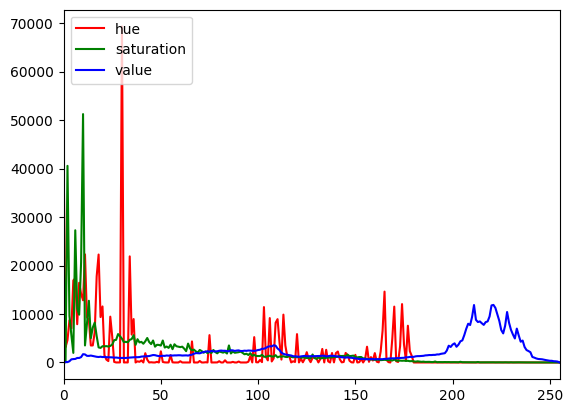

In [28]:
# To create a histogram, the image is first converted from RGB scale to HSV scale
# Convert to HSV
img_hist = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Create a histogram of HSV values.

# Hue
hist = cv2.calcHist([img_hist],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img_hist],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img_hist],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()


Modify your image with brightness and contrast so it fills the complete tonal range.


In [29]:
# To modify the image, we use RGB scale image.

def adjust_brightness_contrast(image_array, alpha, beta):
# Convert to floating point to avoid overflow and underflow
  temp = image_array.astype('float32')
# Adjust contrast
  temp *= alpha
# Adjust brightness
  temp += beta
# Clip values to be in the range [0, 255]
  temp = np.clip(temp, 0, 255)
  return temp.astype('uint8')

In [30]:
adjusted_img = adjust_brightness_contrast(img, 1,0)
copy_img = adjusted_img.copy()

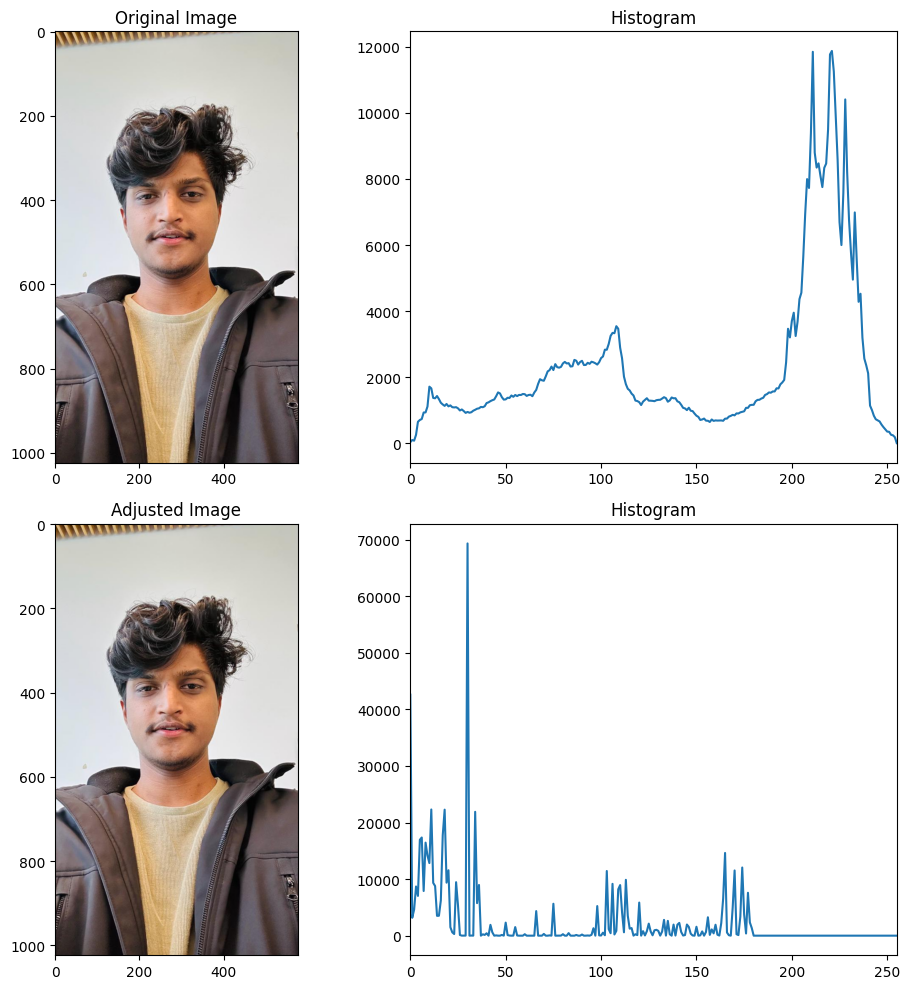

In [31]:
# Calculate histogram of adjusted image
adjusted_hist = cv2.calcHist([img_hist],[0],None,[256],[0,255])
# Plotting original and adjusted images side-by-side
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.plot(hist)
plt.xlim([0,255])
plt.title('Histogram')
plt.subplot(2, 2, 3)
plt.imshow(adjusted_img, cmap="gray", vmin=0, vmax=255)
plt.title('Adjusted Image')
plt.subplot(2, 2, 4)
plt.plot(adjusted_hist)
plt.xlim([0,255])
plt.title('Histogram')
plt.tight_layout()
plt.show()

Create a mask of your face.

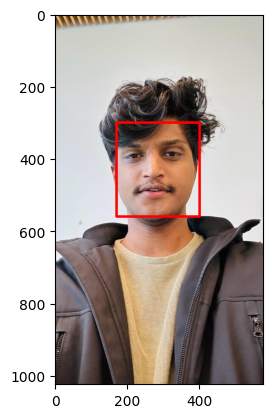

In [32]:
top_left = (170,300)
# Bottom right corner of rectangle
bottom_right = (400,560)
# Color
rect_color = (255,0,0)
# Thickness
thickness = 5
# Rectangle function
img_rect = cv2.rectangle(adjusted_img, top_left, bottom_right, rect_color, thickness)
# Plot image
plt.imshow(img_rect)

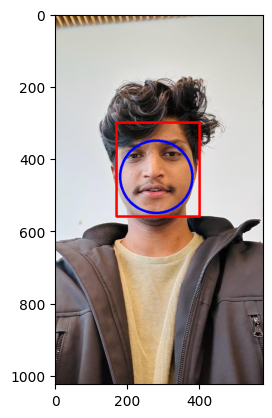

In [33]:
center_circle = (280,450)
# Radius of the circle
radius = 100
# Color
circle_color = (0, 0, 255)
# Add circle to image

img_circle = cv2.circle(adjusted_img, center_circle, radius, circle_color, thickness)
plt.imshow(img_circle)

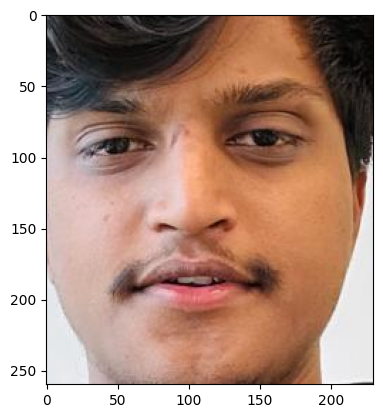

In [34]:
img_masked = copy_img[300:560, 170:400]
plt.imshow(img_masked)

Use the mask to create a HSV histogram

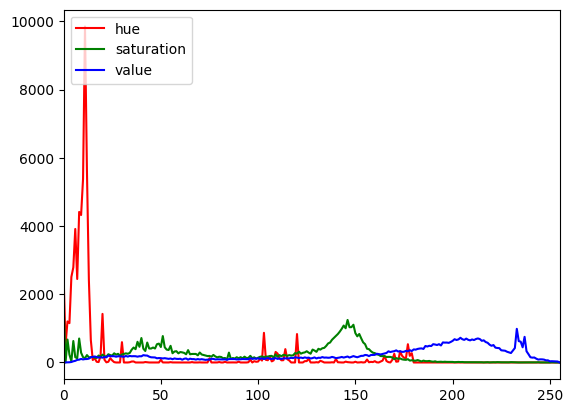

In [35]:
# Create a histogram of HSV values.
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)


# Hue
hist = cv2.calcHist([img_masked],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

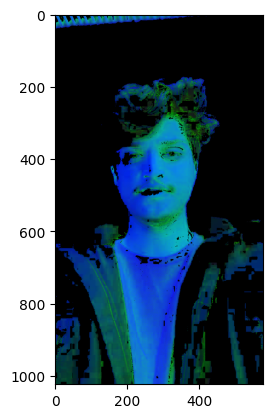

In [36]:
mask = cv2.inRange(img_hist,np.uint8([0,20,0]),np.uint8([20,185,255]))
img_masked = cv2.bitwise_and(img_hist, img_hist, mask=mask)
plt.imshow(img_masked)

Apply the mask to the image and segment out your skin/face.

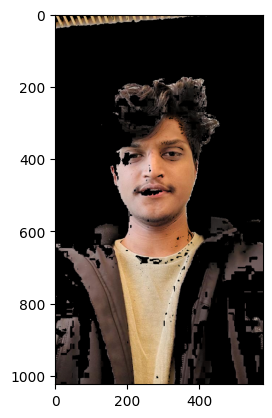

In [37]:
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_HSV2RGB)
plt.imshow(img_masked)